In [1]:
### 1. import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)


### 2. read data

data = pd.read_excel('melon_dataset.xlsx')


### 3. clean data

### 3.1. handle missing values
### ### no NaN to remove

### 3.2. handle outliers

_filter = data['WATER REQUIREMENT'] < 15
data = data[_filter]


### 4. split Dataset into training & test sets

target_name = 'WATER REQUIREMENT'
feature_name = list(data.columns.drop(target_name))

X = data[feature_name]
y = data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)


### 5. data preparation

numerical_feature = []
categorical_feature = ['SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']
ordinal_feature = ['SOIL TYPE', 'REGION', 'TEMPERATURE']
nominal_feature = ['WEATHER CONDITION']

### 5.1. ordinal encoding

categories = [
    np.array(['DRY', 'HUMID', 'WET'], dtype=object),
    np.array(['DESERT', 'SEMI ARID', 'SEMI HUMID', 'HUMID'], dtype=object),
    np.array(['10-20', '20-30', '30-40', '40-50'], dtype=object)
]

ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

### 5.2. one hot encoding

one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)
        
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)


### 6. model creation

reg = LinearRegression()
reg.fit(X_train, y_train)


### 7. prediction

y_pred_train = reg.predict(X_train)

y_pred_test = reg.predict(X_test)

### Check Assumption : Linear Relationship (Scatter Plot)

Text(0, 0.5, 'y')

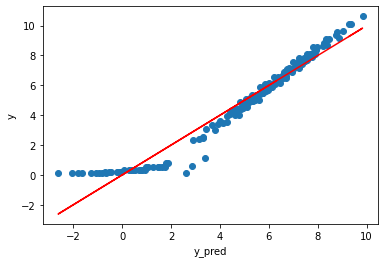

In [2]:
plt.scatter(y_pred_train, y_train)
plt.plot(y_pred_train, y_pred_train, color='red')
plt.xlabel('y_pred')
plt.ylabel('y')

### Check Assumption : Normality of Residuals

In [3]:
residual_train = y_train - y_pred_train

Text(0, 0.5, 'Frequency')

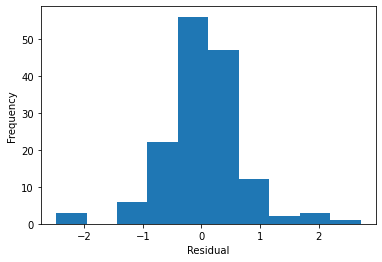

In [4]:
plt.hist(residual_train)
plt.xlabel('Residual')
plt.ylabel('Frequency')

### Check Assumption : Homoscedasticity

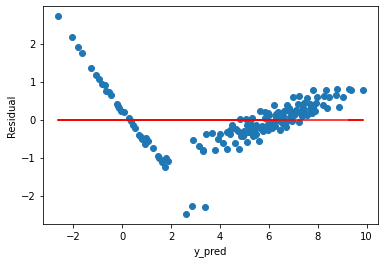

In [5]:
plt.scatter(y_pred_train, residual_train)
plt.xlabel('y_pred')
plt.ylabel('Residual')
plt.plot(y_pred_train, np.zeros([y_train.shape[0]]), color='red')